In [65]:
#Imports needed for the entire assignments
import math
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
from torch import nn
from torch import optim
from numpy import genfromtxt # we use this to load data from a csv into a NumPy array



# Task A - 1D regression using a simple FANN

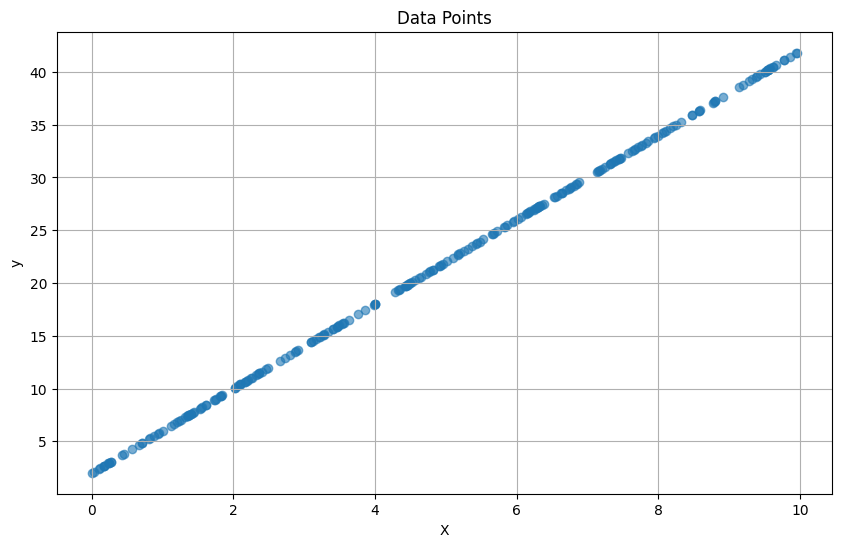

In [66]:
#2.1
a_true = 4.0 # choose your own value here
b_true = 2.0 # choose your own value here
sigma_epsilon = 0 # choose your own noise level here

X = np . random . uniform (0 , 10 , 250) # sample 250 values x_n in [0 ,10]
y_obs = a_true * X + b_true + sigma_epsilon * np . random . randn ( len ( X ) )

# Convert to one observation per row and then convert into PyTorch tensors
X = torch.tensor(X).reshape(len(X) ,1).float ()
y_obs = torch . tensor ( y_obs ) . reshape ( len ( y_obs ) ,1) . float ()

plt.figure(figsize=(10, 6))

# Plot original data points
plt.scatter(X.numpy(), y_obs.numpy(), alpha=0.6,)

plt.title('Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [67]:
#2.2 make tensor set

batch_size = 30

train_dataset = TensorDataset(X, y_obs)

my_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [68]:
#2.3 one-dim function

model = nn.Sequential(
    nn.Linear(in_features=1, out_features=1)
)

In [69]:
#2.4 cost func
cost_function = nn.MSELoss() # because the task is a regression problem

In [70]:
#2.5 learning rate and optimizer

learning_rate = 0.001

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

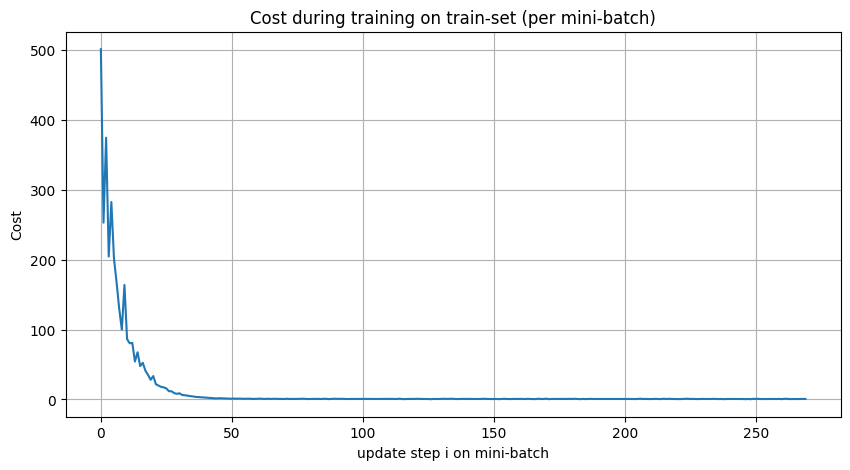

In [71]:
#2.6 training loop and plot cost
training_minibatch_Js = []
nr_epochs = 30

for epoch_i in range(nr_epochs):

    for X_batch, y_batch in my_dataloader:

        y_preds = model(X_batch)
        cost = cost_function(y_preds, y_batch)
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        training_minibatch_Js.append(cost.item())

plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel('update step i on mini-batch')
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()
plt.show()

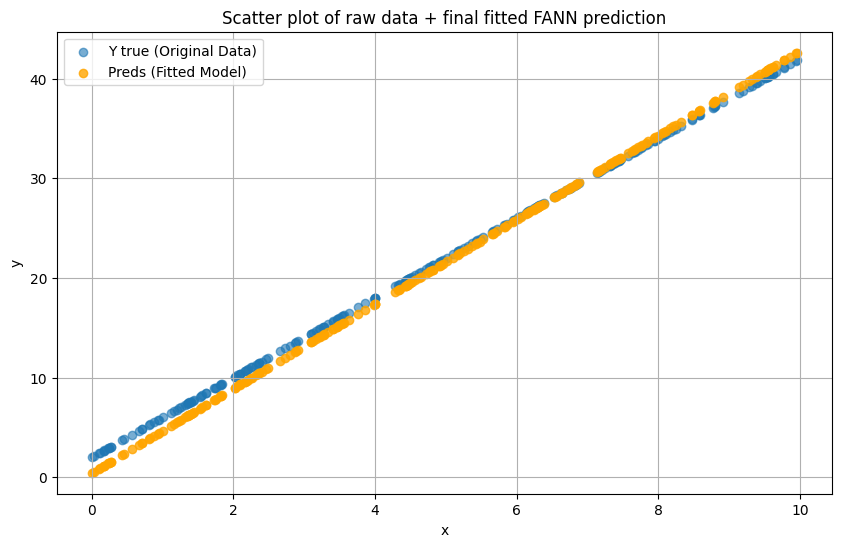

In [72]:
#2.7 predict data

with torch.no_grad():
    y_preds = model(X)

# 2. Plot the original data and the model's predictions
plt.figure(figsize=(10, 6))

plt.scatter(X.numpy(), y_obs.numpy(), alpha=0.6, label='Y true (Original Data)')


plt.scatter(X.numpy(), y_preds.numpy(), color='orange', alpha=0.8, label='Preds (Fitted Model)')

plt.title('Scatter plot of raw data + final fitted FANN prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
#2.8 model summary
for p in model.named_parameters():
  print(p)

('0.weight', Parameter containing:
tensor([[4.2350]], requires_grad=True))
('0.bias', Parameter containing:
tensor([0.4375], requires_grad=True))


#Problem 3.1 - A single artificial neuron

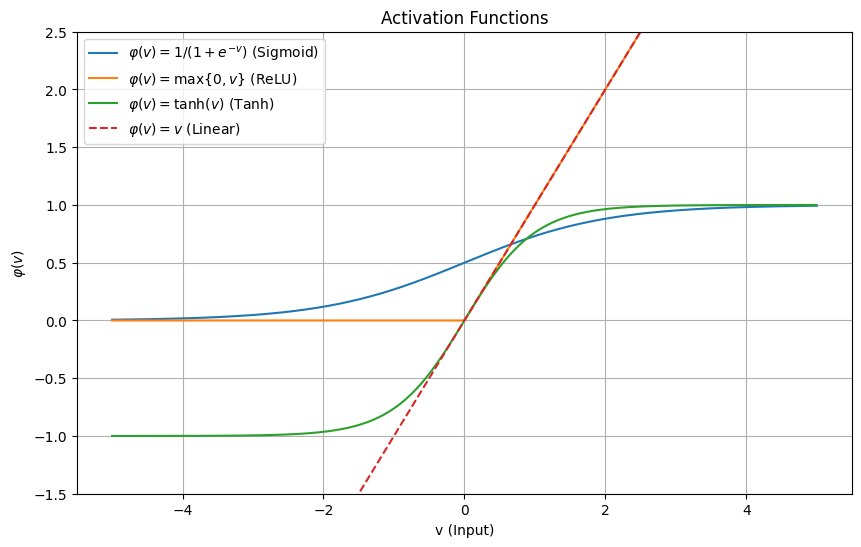

In [74]:
#a)

v = np.linspace(-5, 5, 400)

phi_sigmoid = 1 / (1 + np.exp(-v))
phi_relu = np.maximum(0, v)
phi_tanh = np.tanh(v)
phi_linear = v

plt.figure(figsize=(10, 6))

plt.plot(v, phi_sigmoid, label=r'$\varphi(v) = 1 / (1 + e^{-v})$ (Sigmoid)')
plt.plot(v, phi_relu, label=r'$\varphi(v) = \max\{0, v\}$ (ReLU)')
plt.plot(v, phi_tanh, label=r'$\varphi(v) = \tanh(v)$ (Tanh)')
plt.plot(v, phi_linear, label=r'$\varphi(v) = v$ (Linear)', linestyle='--')

plt.title('Activation Functions')
plt.xlabel('v (Input)')
plt.ylabel(r'$\varphi(v)$')
plt.legend()
plt.grid(True)
plt.ylim(-1.5, 2.5)
plt.show()

b).
Based on the definition of a single artificial neuron1, the two adjustable parameters are:


*   The weight ($w_1$): This value is multiplied by the input $x$.
*   The bias ($w_0$): This value is added to the weighted sum (or a threshold is subtracted).



The neuron first computes $v = w_0 + w_1x$, and then applies the activation function $y = \varphi(v)$.

c.) A single neuron with a $d$-dimensional input has $d+1$ adjustable parameters:


*   $d$ weights: one weight ($w_i$) for each of the $d$ input dimensions ($x_1,x_2 ..., x_d$).
*   1 bias: the single bias term $w_0$.





# Problem 3.2: Number of tunable parameters in Multilayer FANN

From Input to Hidden Layer 1 (2 inputs -> 5 neurons):

*   Weights: $2 \times 5 = 10$
*   Biases: $5$
*   Subtotal: $15$

From Hidden Layer 1 to Hidden Layer 2 (5 inputs -> 2 neurons):

*   Weights: $5 \times 2 = 10$
*   Biases: $2$
*   Subtotal: $12$




From Hidden Layer 2 to Output Layer (2 inputs -> 1 neuron):
*   Weights: $2 \times 1 = 2$
*   Biases: $1$
*   Subtotal: 3

Total: $15 + 12 + 3 = 30$ parameters.

# Problem 3.3: Mathematical expression for a Multilayer FANN output

1. First Hidden Layer Output ($h_k$)Let $h_k$ be the output of the $k$-th neuron in the first hidden layer ($k \in \{1, \dots, 5\}$).

This neuron receives the network inputs $x_1$ and $x_2$, weighted by $u_{k,1}$ and $u_{k,2}$, and includes the bias $u_{k,0}$.$$h_k = \varphi(u_{k,0} + u_{k,1}x_1 + u_{k,2}x_2)$$

2. Second Hidden Layer Output ($z_j$)The network has two outputs from the second hidden layer: $z_1$ and $z_2$ (i.e., $j \in \{1, 2\}$).

These neurons receive all outputs ($h_k$) from the first hidden layer, weighted by $v_{j,k}$, plus the bias $v_{j,0}$.$$z_j(x_1, x_2) = \varphi\left(v_{j,0} + \sum_{k=1}^{5} v_{j,k} \cdot h_k \right)$$Substituting the expression for $h_k$:$$z_j(x_1, x_2) = \varphi\left(v_{j,0} + \sum_{k=1}^{5} v_{j,k} \cdot \varphi(u_{k,0} + u_{k,1}x_1 + u_{k,2}x_2) \right)$$

3. Output LayerThe final output $y(x_1, x_2)$ is computed using the outputs $z_1$ and $z_2$ from the second hidden layer, weighted by $w_{out,1}$ and $w_{out,2}$, plus the final bias $w_{out,0}$.$$y(x_1, x_2) = \varphi(w_{out,0} + w_{out,1}z_1(x_1, x_2) + w_{out,2}z_2(x_1, x_2))$$

# Problem 3.4: Interpretability of MSE vs RMSE

MSE Unit: $\text{kg}^2$

RMSE Unit: $\sqrt{\text{kg}^2}$ =  $\text{kg}$

# Problem 3.5: Fast weight updating

**Gradient Descent:**

The gradient is calculated using the entire dataset before a single weight update is made. So for 3 epochs the number of updates is 3.

**SGD:**

The weights are updated after every mini batch, we have $10^6$ mini batches per epoch, so we get $10^6$ updates per epoch. For 3 epochs the total number of updates is 3 x $10^6$

So SGD is better beacuse of the learning speed. U take tone milion steps in the same amount of time as conventional gradient descent.

# Problem 3.6: Reduced problems with local minima

Gradient descent calculates the exact gradient using all data and moves precisely downhill. If it encounters a shallow local minimum, it slides to the bottom where the gradient is zero and stops, unable to climb out.

SGD avoids this by approximating the gradient using mini batches, introducing noise into the updates. This random noise allows the algorithm to jump out of a small local minima that whould otherwise stop the gradient descent.

# Task B: Non-linear univariate regression using FANNs

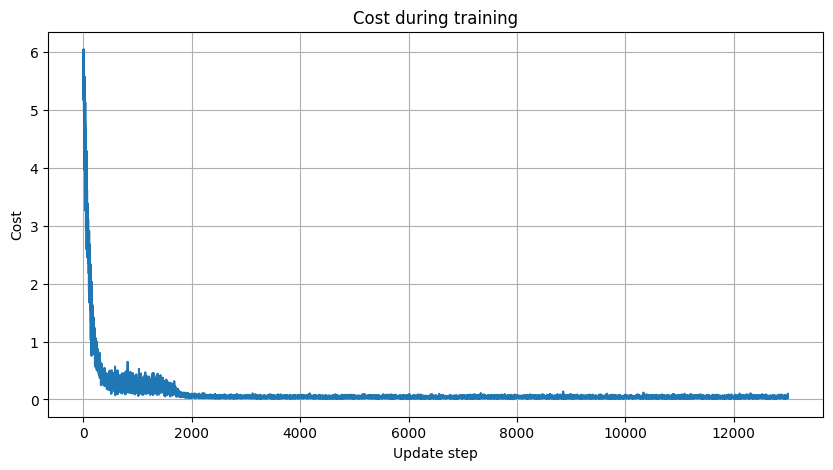

Final MSE: 0.0965


In [75]:
my_data = genfromtxt('dataset_Marvin_Minsky.csv', delimiter=',', skip_header=1)

X_np = my_data[:, 0]    # Extract the x_n
y_obs_np = my_data[:, 1] # Extrac the y_n

X = torch.tensor(X_np).reshape(-1, 1).float()
# turn to column vector , each row corresponds to each y_n
y_obs = torch.tensor(y_obs_np).reshape(-1, 1).float()

my_dataset = TensorDataset(X, y_obs) # create dataset by turning tensors into datasets objects

my_dataloader = DataLoader(my_dataset, batch_size=16, shuffle=True)  # create your dataloader from dataset

model = nn.Sequential(
    nn.Linear(in_features=1, out_features=3),
    nn.Tanh(), #hidden layer 1

    nn.Linear(in_features=3, out_features=3),
    nn.Tanh(), #hidden layer 2

    nn.Linear(in_features=3, out_features=1)
)

cost_function = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

nr_epochs = 1000

training_minibatch_Js = []

for epoch_i in range(nr_epochs):
    for X_batch, y_batch in my_dataloader:

        y_preds = model(X_batch)
        cost = cost_function(y_preds, y_batch)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        training_minibatch_Js.append(cost.item())

final_mse = training_minibatch_Js[-1]

plt.figure(figsize=(10, 5))
plt.plot(training_minibatch_Js)
plt.title('Cost during training')
plt.xlabel('Update step')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

print(f"Final MSE: {final_mse:.4f}")

# Task C: Approximate a bell-shaped bivariate function

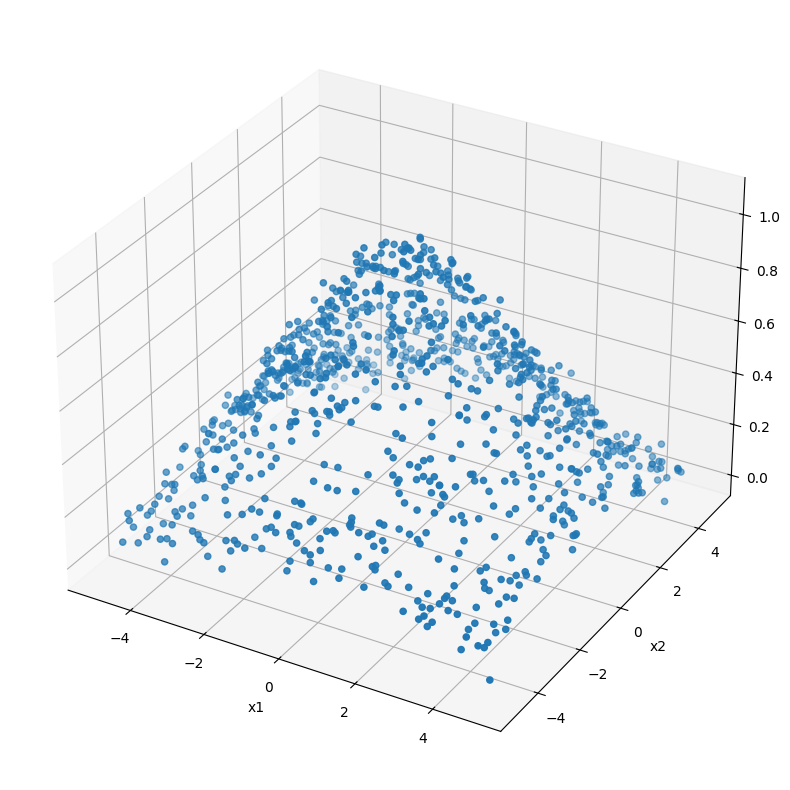

In [76]:
#a.)

N = 1000
sigma_noise = 0.04
nr_epochs = 400
x = 10 * torch.rand(size=[N, 2]) - 5
y = torch.zeros(N).reshape(-1, 1)

for i in range(N):
    x_i = x[i, :]
    squared_norm = torch.dot(x_i, x_i) # ||x||^2
    y_true = torch.exp(-squared_norm / 16)

    # Add Gaussian noise
    y[i] = y_true + sigma_noise * torch.randn(1)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection='3d')
ax.scatter(x [:,0].reshape(-1 ,1), x[:,1].reshape(-1 ,1), y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# Create DataLoader
my_dataset = TensorDataset(x, y)
my_dataloader = DataLoader(my_dataset, batch_size=32, shuffle=True)
cost_function = nn.MSELoss()

In [77]:
#b.)

# Architecture I
model_I = nn.Sequential(
    nn.Linear(2, 40),
    nn.ReLU(),
    nn.Linear(40, 1)
)
optimizer_I = optim.SGD(model_I.parameters(), lr=0.01)

# Architecture II
model_II = nn.Sequential(
    nn.Linear(2, 40), nn.ReLU(),
    nn.Linear(40, 40), nn.ReLU(),
    nn.Linear(40, 40), nn.ReLU(),
    nn.Linear(40, 1)
)
optimizer_II = optim.SGD(model_II.parameters(), lr=0.01)


In [78]:
#c.)

LR = 0.01
NR_EPOCHS = 400

# Training Loop I
cost_history_I = []
for epoch in range(NR_EPOCHS):
    for X_batch, y_batch in my_dataloader:
        y_preds = model_I(X_batch)
        cost = cost_function(y_preds, y_batch)
        optimizer_I.zero_grad()
        cost.backward()
        optimizer_I.step()
        cost_history_I.append(cost.item())

final_mse_I = cost_history_I[-1]
print(f"Final MSE for Architecture I: {final_mse_I:.6f}")

# Training Loop II
cost_history_II = []
for epoch in range(NR_EPOCHS):
    for X_batch, y_batch in my_dataloader:
        y_preds = model_II(X_batch)
        cost = cost_function(y_preds, y_batch)
        optimizer_II.zero_grad()
        cost.backward()
        optimizer_II.step()
        cost_history_II.append(cost.item())

final_mse_II = cost_history_II[-1]
print(f"Final MSE for Architecture II: {final_mse_II:.6f}")

Final MSE for Architecture I: 0.001561
Final MSE for Architecture II: 0.002042


(-0.1, 1.2)

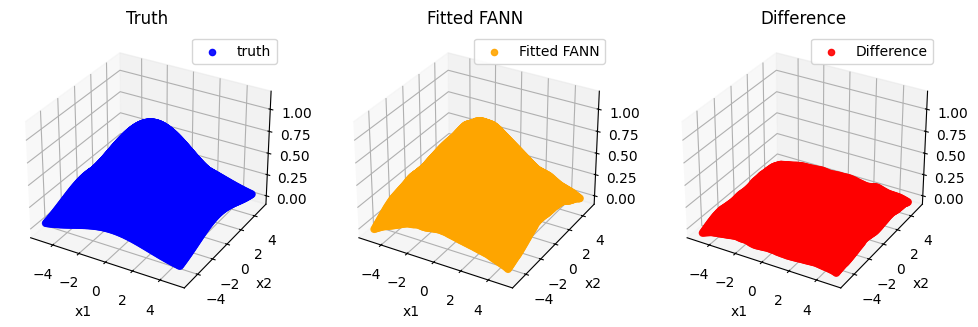

In [79]:
#d.)

mean_true = torch.tensor([0.0, 0.0])

x1 = torch.linspace(start=-5, end=5, steps=100)
x2 = torch.linspace(start=-5, end=5, steps=100)
X, Y = torch.meshgrid(x1, x2)

s = torch.stack([X.ravel(), Y.ravel()], dim=1)

y_true = torch.zeros(len(s)).reshape(-1,1)
y_preds = torch.zeros(len(s)).reshape(-1,1)

for i in range(len(s)):
  s_i = s[i ,:]
  y_true[i] = torch.exp(-((s_i - mean_true) @ (s_i - mean_true).T) / 16) + 0.0 * torch.randn(1)

  with torch.no_grad():
    y_preds[i] = model_II(s[i ,:])

d = y_preds - y_true

S_x = s[:, 0].numpy()
S_y = s[:, 1].numpy()
Y_true_np = y_true.numpy().flatten()
Y_preds_np = y_preds.numpy().flatten()
D_np = d.numpy().flatten()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'projection': '3d'}, figsize=(12, 5))

ax1.scatter(S_x, S_y, Y_true_np, c='blue', label='truth', alpha=0.9)
ax1.set_title('Truth')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.legend()
ax1.set_zlim(-0.1, 1.2)

ax2.scatter(S_x, S_y, Y_preds_np, c='orange', label='Fitted FANN', alpha=0.9)
ax2.set_title('Fitted FANN')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.legend()
ax2.set_zlim(-0.1, 1.2)

ax3.scatter(S_x, S_y, D_np, c='red', label='Difference', alpha=0.9)
ax3.set_title('Difference')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.legend()
ax3.set_zlim(-0.1, 1.2)


# Task D: Model selection using a validation set

In [80]:
def generate_bell_data(N, sigma_noise=0.04):
    X = 10 * torch.rand(size=[N, 2]) - 5
    y = torch.zeros(N).reshape(-1, 1)
    mean_true = torch.tensor([0.0, 0.0])
    for i in range(N):
        x_i = X[i, :]
        squared_norm = torch.dot(x_i, x_i)
        y_true = torch.exp(-squared_norm / 16)
        y[i] = y_true + sigma_noise * torch.randn(1)
    return X.float(), y.float()

def calculate_rmse(model, X_data, y_true):
    model.eval()
    with torch.no_grad():
        y_preds = model(X_data)
        mse = nn.MSELoss()(y_preds, y_true)
        rmse = torch.sqrt(mse).item()
    model.train()
    return rmse

# Generate and evaluate N=5 noisy validation examples
N_VAL = 5
X_val, y_val_noisy = generate_bell_data(N_VAL, sigma_noise=0.04)

rmse_I_val = calculate_rmse(model_I, X_val, y_val_noisy)
rmse_II_val = calculate_rmse(model_II, X_val, y_val_noisy)

# Select the model with the lowest validation RMSE
if rmse_I_val < rmse_II_val:
    best_model_name = "Architecture I"
    best_model = model_I
    rejected_model = model_II
else:
    best_model_name = "Architecture II"
    best_model = model_II
    rejected_model = model_I

print(f"Validation RMSE - Architecture I: {rmse_I_val:.6f}")
print(f"Validation RMSE - Architecture II: {rmse_II_val:.6f}")
print(f"Chosen Model: {best_model_name}")


# Generate N=25,000 noise-free test examples
N_TEST = 25000
# Generate test set with zero noise (sigma_noise=0.0) to measure approximation error
X_test, y_test_true = generate_bell_data(N_TEST, sigma_noise=0.0)

rmse_true_best = calculate_rmse(best_model, X_test, y_test_true)
print(f"True Performance of CHOSEN Model ({best_model_name}): {rmse_true_best:.6f}")

#True Performance of rejected model
rmse_true_rejected = calculate_rmse(rejected_model, X_test, y_test_true)
print(f"True Performance of REJECTED Model ({rejected_model}): {rmse_true_rejected:.6f}")

Validation RMSE - Architecture I: 0.023020
Validation RMSE - Architecture II: 0.026031
Chosen Model: Architecture I
True Performance of CHOSEN Model (Architecture I): 0.028910
True Performance of REJECTED Model (Sequential(
  (0): Linear(in_features=2, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=40, bias=True)
  (3): ReLU()
  (4): Linear(in_features=40, out_features=40, bias=True)
  (5): ReLU()
  (6): Linear(in_features=40, out_features=1, bias=True)
)): 0.013198


(c) Comparing N=5 vs. N=25,000

The estimate from the $N=5$ validation set is highly unreliable. Because the sample is so small, the RMSE value is subject to significant variance. It can be wildly optimistic or pessimistic compared to the "almost true" RMSE obtained with $N=25,000$.Conclusion: Yes, the number of validation examples should have been much more than 5. A small sample size leads to poor statistical estimation, meaning the model chosen may not actually be the best performer.

(d) Performance of the Rejected Model

Purpose: This step measures the unbiased, true performance of the rejected model.Significance: If the true RMSE of the rejected model (measured at $N=25000$) is actually lower than the true RMSE of the selected model, it means the small $N=5$ validation set made the wrong model selection decision, confirming the unreliability of small data sets for critical tasks.

# Task E: Early Stopping Using a Validation Set

RUN 1
Earlier 3-epoch avg RMSE: 0.076719
Recent 3-epoch avg RMSE: 0.076743

Training stopped at Epoch: 124
Final Model RMSE on small Test Set (N=25): 0.075799
True Performance RMSE (N=25000, Noisy): 0.073367
Difference (N=25 vs N=25000): 0.002432


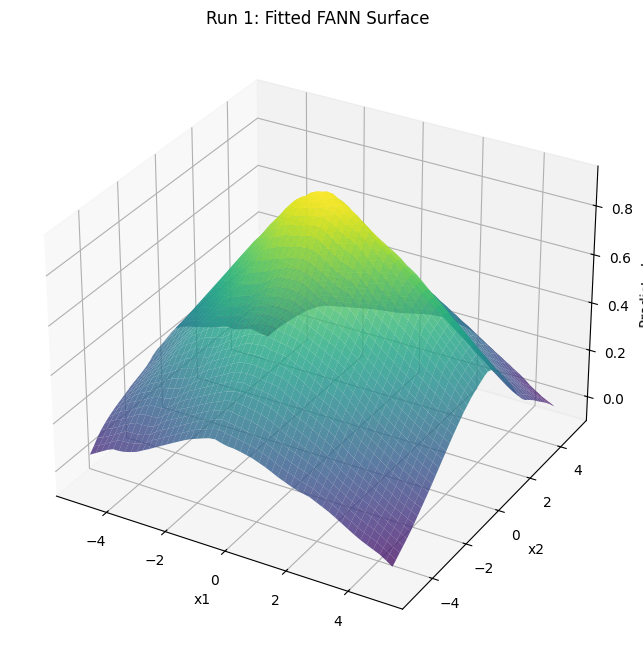

RUN 2
Earlier 3-epoch avg RMSE: 0.060271
Recent 3-epoch avg RMSE: 0.060535

Training stopped at Epoch: 158
Final Model RMSE on small Test Set (N=25): 0.068939
True Performance RMSE (N=25000, Noisy): 0.062656
Difference (N=25 vs N=25000): 0.006284


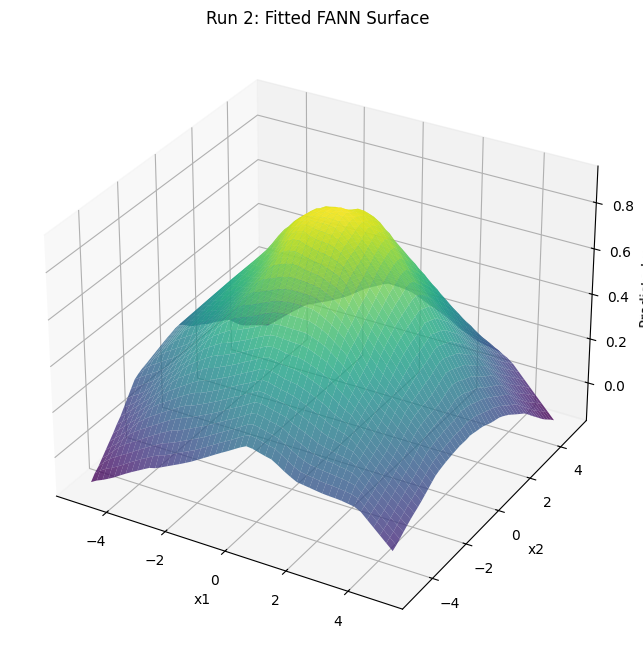

RUN 3
Earlier 3-epoch avg RMSE: 0.076008
Recent 3-epoch avg RMSE: 0.076282

Training stopped at Epoch: 79
Final Model RMSE on small Test Set (N=25): 0.073716
True Performance RMSE (N=25000, Noisy): 0.067529
Difference (N=25 vs N=25000): 0.006187


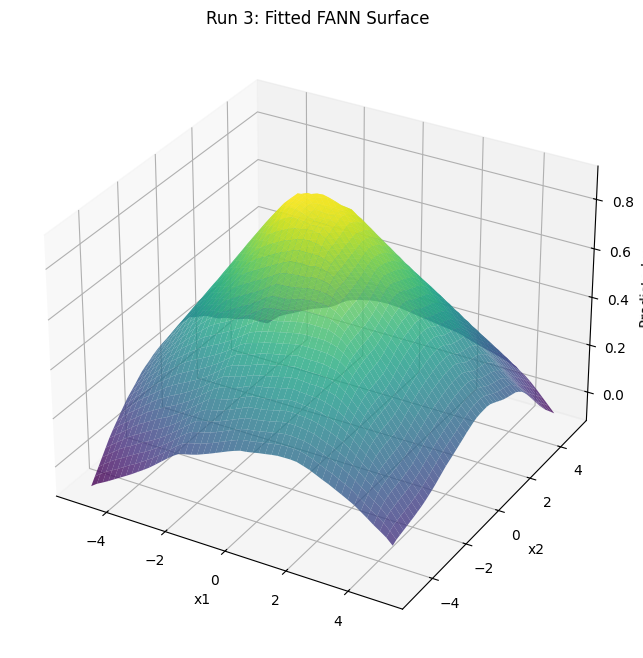

RUN 4
Earlier 3-epoch avg RMSE: 0.044602
Recent 3-epoch avg RMSE: 0.045015

Training stopped at Epoch: 139
Final Model RMSE on small Test Set (N=25): 0.059995
True Performance RMSE (N=25000, Noisy): 0.059383
Difference (N=25 vs N=25000): 0.000612


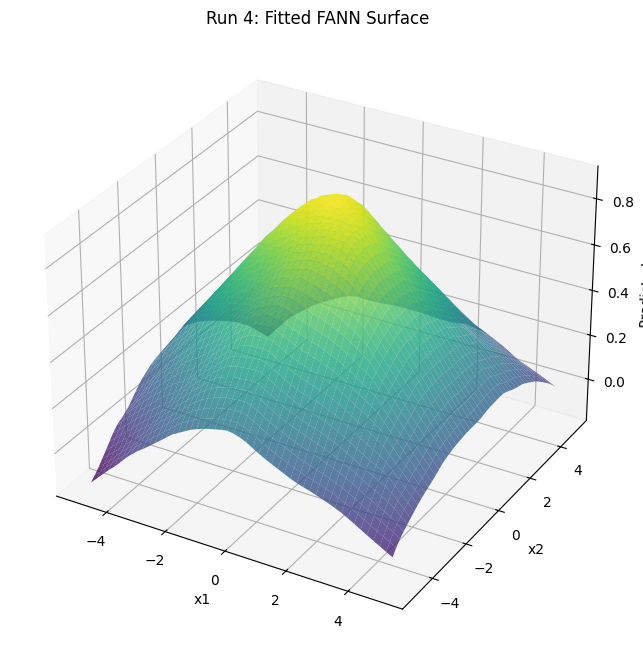

SUMMARY OF ALL RUNS:
Run    Stop Epoch   RMSE(25)     RMSE(25k)    Difference  
1      124          0.075799     0.073367     0.002432    
2      158          0.068939     0.062656     0.006284    
3      79           0.073716     0.067529     0.006187    
4      139          0.059995     0.059383     0.000612    
OBSERVATIONS:
Average difference between 25 and 25000 test examples: 0.003879
Standard deviation of differences: 0.002443


In [81]:

def generate_bell_data(N, sigma_noise=0.04):
    x = 10 * torch.rand(size=[N, 2]) - 5
    mean_true = torch.tensor([0.0, 0.0])
    y = torch.zeros(N).reshape(-1, 1)

    for i in range(len(x)):
        y[i] = torch.exp(-((x[i, :] - mean_true).T @ (x[i, :] - mean_true)) / 16) + \
               sigma_noise * torch.randn(1)

    return x, y

def calculate_rmse(model, x, y):
    model.eval()
    with torch.no_grad():
        y_preds = model(x)
        mse = nn.MSELoss()(y_preds, y)
        rmse = torch.sqrt(mse).item()
    model.train()
    return rmse

def train_with_early_stopping(run_number=1):
    print(f"RUN {run_number}")

    x, y = generate_bell_data(100, sigma_noise=0.04)
    full_dataset = TensorDataset(x, y)

    train_size, val_size, test_size = 50, 25, 25
    train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

    x_val, y_val = val_dataset[:][0], val_dataset[:][1]

    BATCH_SIZE = 8
    train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

    # Model and Setup
    model = nn.Sequential(
        nn.Linear(2, 40),
        nn.ReLU(),
        nn.Linear(40, 40),
        nn.ReLU(),
        nn.Linear(40, 40),
        nn.ReLU(),
        nn.Linear(40, 1)
    )
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    cost_function = nn.MSELoss()

    MAX_EPOCHS = 200
    val_rmses = []
    train_costs = []
    stopping_epoch = MAX_EPOCHS
    training_terminated = False

    # Training loop
    for epoch_i in range(MAX_EPOCHS):
        model.train()
        epoch_costs = []

        for X_batch, y_batch in train_dataloader:
            cost = cost_function(model(X_batch), y_batch)
            optimizer.zero_grad()
            cost.backward()
            optimizer.step()
            epoch_costs.append(cost.item())

        # Track training cost
        train_costs.append(np.mean(epoch_costs))

        # Calculate validation RMSE
        val_rmse = calculate_rmse(model, x_val, y_val)
        val_rmses.append(val_rmse)


        # Early stopping check (after epoch 6)
        if epoch_i >= 5:
            recent_avg = np.mean(val_rmses[-3:])
            earlier_avg = np.mean(val_rmses[-6:-3])

            # Stopping Condition: if recent average validation RMSE starts increasing
            if recent_avg > earlier_avg:
                stopping_epoch = epoch_i + 1
                training_terminated = True
                print(f"Earlier 3-epoch avg RMSE: {earlier_avg:.6f}")
                print(f"Recent 3-epoch avg RMSE: {recent_avg:.6f}")
                break

    if not training_terminated:
        print(f"\nCompleted all {MAX_EPOCHS} epochs without early stopping")

    print(f"\nTraining stopped at Epoch: {stopping_epoch}")

    # Evaluate on small test set (25 examples)
    X_test_small, y_test_small = test_dataset[:][0], test_dataset[:][1]
    small_test_rmse = calculate_rmse(model, X_test_small, y_test_small)
    print(f"Final Model RMSE on small Test Set (N=25): {small_test_rmse:.6f}")

    # Evaluate on large test set (25000 examples) for true performance
    N_BIG_TEST = 25000
    X_big_test_noisy, y_big_test_noisy = generate_bell_data(N_BIG_TEST, sigma_noise=0.04)
    true_performance_rmse = calculate_rmse(model, X_big_test_noisy, y_big_test_noisy)
    print(f"True Performance RMSE (N=25000, Noisy): {true_performance_rmse:.6f}")

    difference = abs(small_test_rmse - true_performance_rmse)
    print(f"Difference (N=25 vs N=25000): {difference:.6f}")


    # Plot
    x1_plot = torch.linspace(start=-5, end=5, steps=50)
    x2_plot = torch.linspace(start=-5, end=5, steps=50)
    X_mesh, Y_mesh = torch.meshgrid(x1_plot, x2_plot, indexing='ij')

    s_plot = torch.stack([X_mesh.ravel(), Y_mesh.ravel()], dim=1)

    # Get predictions from the trained model
    model.eval()
    with torch.no_grad():
        y_preds_plot = model(s_plot).numpy()

    # Convert to numpy for plotting
    X_mesh_np = X_mesh.numpy()
    Y_mesh_np = Y_mesh.numpy()
    Z_preds_plot = y_preds_plot.reshape(X_mesh_np.shape)

    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X_mesh_np, Y_mesh_np, Z_preds_plot, cmap='viridis', alpha=0.8)

    ax.set_title(f'Run {run_number}: Fitted FANN Surface')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Predicted y')
    plt.show()

    return {
        'run': run_number,
        'early_stop_epoch': stopping_epoch,
        'test_rmse_25': small_test_rmse,
        'test_rmse_25000': true_performance_rmse,
        'difference': difference
    }


results = []
for i in range(4):
    result = train_with_early_stopping(run_number=i+1)
    results.append(result)

# Summary of all runs
print("SUMMARY OF ALL RUNS:")
print(f"{'Run':<6} {'Stop Epoch':<12} {'RMSE(25)':<12} {'RMSE(25k)':<12} {'Difference':<12}")
for r in results:
    print(f"{r['run']:<6} {r['early_stop_epoch']:<12} {r['test_rmse_25']:<12.6f} "
          f"{r['test_rmse_25000']:<12.6f} {r['difference']:<12.6f}")

print("OBSERVATIONS:")
avg_diff = np.mean([r['difference'] for r in results])
std_diff = np.std([r['difference'] for r in results])
print(f"Average difference between 25 and 25000 test examples: {avg_diff:.6f}")
print(f"Standard deviation of differences: {std_diff:.6f}")


Reflection: The difference between the small Test RMSE and the massive True Performance RMSE shows the variance introduced by the limited size of the test set.

While the Early Stopping rule prevents severe overfitting to the N=50 training set, the final RMSE reported by the N=25 test set is still subject to random sampling error, which the N=25000 set eliminates.

This experiment must be repeated 3-4 times to assess the stability and variability of the results.

Variability across runs shows the impact of:
- Random initialization of network weights
- Random selection of training/validation/test splits
- Stochastic nature of mini-batch gradient descent